In [ ]:
# Transforming 5y data using forward orthogonal deviations transformation

"""" 
Plan:
- adding variables for transformation
- performing transformation
""""

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
os.chdir("C:\\Users\\Vladimir.Grigoryev\\Documents\\Python Scripts\\eci")

In [62]:
path = pd.read_csv("5y_dataset.csv")
dk = pd.DataFrame(path)
dk.drop("Unnamed: 0", axis=1, inplace=True)
dk.head(15)

,eci1,eci2,eci3,gdp_pc,population,res_exp1_to_gdp,res_exp2_to_gdp,res_exp3_to_gdp,oil_rents,res_rents,oil_prod_pc,map,code,year
0,NaN,NaN,NaN,NaN,55920.2,NaN,NaN,NaN,NaN,NaN,NaN,ABW1960,ABW,1960
1,NaN,NaN,NaN,NaN,58048.4,NaN,NaN,NaN,NaN,NaN,NaN,ABW1965,ABW,1965
2,NaN,NaN,NaN,NaN,59822.8,NaN,NaN,NaN,NaN,NaN,NaN,ABW1970,ABW,1970
3,NaN,NaN,NaN,NaN,60338.4,NaN,NaN,NaN,NaN,NaN,NaN,ABW1975,ABW,1975
4,NaN,NaN,NaN,NaN,61409.0,NaN,NaN,NaN,NaN,NaN,NaN,ABW1980,ABW,1980
5,-1.675132,-1.607907,-1.882517,8878.886091,61922.8,0.002763,0.002937,0.003671,0.000000,0.000670,0.000000e+00,ABW1985,ABW,1985
6,-0.611539,-0.582506,-0.743893,14205.538497,68842.0,0.305848,0.307596,0.310458,0.000000,0.001286,-2.567972e-07,ABW1990,ABW,1990
7,-0.725764,-0.879930,-1.235726,17877.544202,85051.4,0.480627,0.488937,0.503369,0.000000,0.000911,0.000000e+00,ABW1995,ABW,1995
8,-1.289946,-1.292263,-1.489566,21026.071264,94899.4,0.393618,0.398277,0.413801,0.000000,0.000692,2.488958e-05,ABW2000,ABW,2000
9,-1.256261,-1.281521,-1.552428,24979.682247,100977.8,0.775104,0.778384,0.804815,0.000000,0.000886,2.443362e-05,ABW2005,ABW,2005


In [3]:
# adding total number of periods for each country
dh = dk
dh["T"] = 0
dh["t"] = 0

for i in dh.index:
    filt = dh.code == dh.at[i, "code"]
    inst = dh[filt]
    dh.at[i, "T"] = len(inst)

In [4]:
# adding period number for each country series
for i in dh.index:
    if i == 0:
        dh.at[0, "t"] = 1
    elif dh.at[i, "code"] == dh.at[i-1, "code"]:
        dh.at[i, "t"] = dh.at[i-1, "t"] + 1
    else:
        dh.at[i, "t"] = 1

In [65]:
ds = dh
dl = ds[['eci1', 'eci2', 'eci3', 'gdp_pc', 'population', 'res_exp1_to_gdp',
       'res_exp2_to_gdp', 'res_exp3_to_gdp', 'oil_rents', 'res_rents',
       'oil_prod_pc']]

In [66]:
# performing transformation

for col in dl.columns:
    for i in ds.index:
        if ds.at[i, "T"] == ds.at[i, "t"]:
            ds.at[i, col] = np.nan
        elif ds.at[i, "T"] != ds.at[i, "t"]:
            filt = ds.code  == ds.at[i, "code"]
            inst = ds[filt]
            c = 1/(ds.at[i, "T"] - ds.at[i, "t"])
            b = ds[col][i+1:ds.at[i, "T"]].sum()
            a = math.sqrt((ds.at[i, "T"] - ds.at[i, "t"])/(ds.at[i, "T"] - ds.at[i, "t"] + 1))
            ds.at[i, col] = a*(ds.at[i, col] - c*b)
            
ds.head()

,eci1,eci2,eci3,gdp_pc,population,res_exp1_to_gdp,res_exp2_to_gdp,res_exp3_to_gdp,oil_rents,res_rents,oil_prod_pc,map,code,year,T,t
0,NaN,NaN,NaN,NaN,15985.182581,NaN,NaN,NaN,NaN,NaN,NaN,ABW1960,ABW,1960,12,1
1,NaN,NaN,NaN,NaN,16280.982634,NaN,NaN,NaN,NaN,NaN,NaN,ABW1965,ABW,1965,12,2
2,NaN,NaN,NaN,NaN,15863.412421,NaN,NaN,NaN,NaN,NaN,NaN,ABW1970,ABW,1970,12,3
3,NaN,NaN,NaN,NaN,13291.931626,NaN,NaN,NaN,NaN,NaN,NaN,ABW1975,ABW,1975,12,4
4,NaN,NaN,NaN,NaN,9668.204912,NaN,NaN,NaN,NaN,NaN,NaN,ABW1980,ABW,1980,12,5


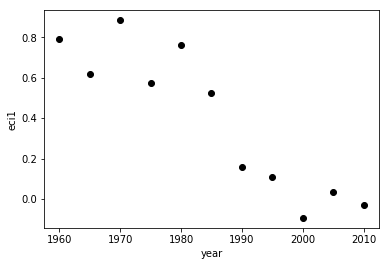

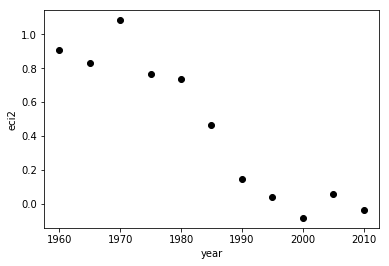

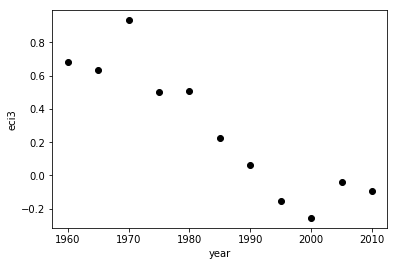

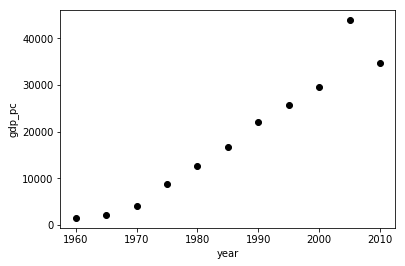

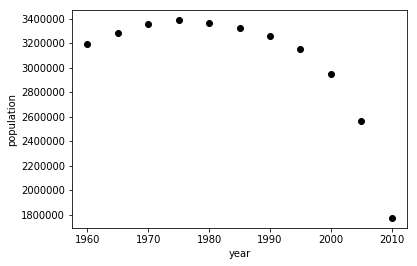

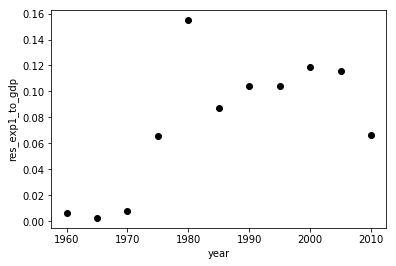

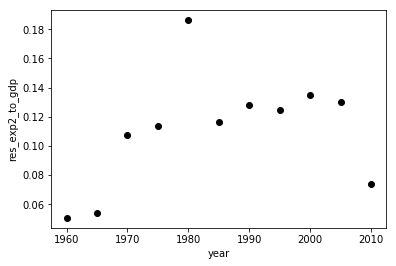

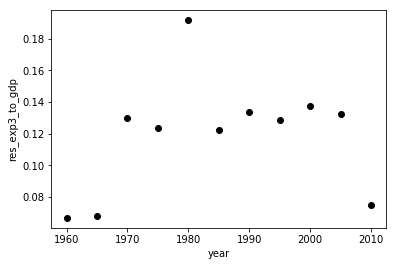

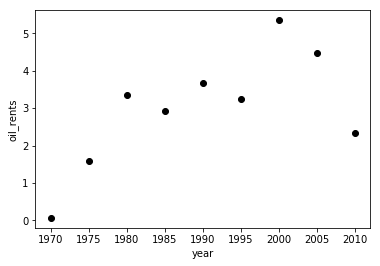

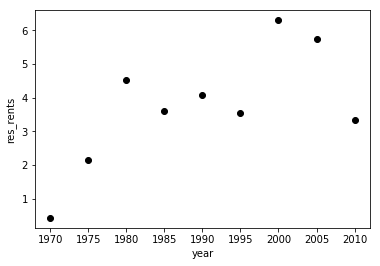

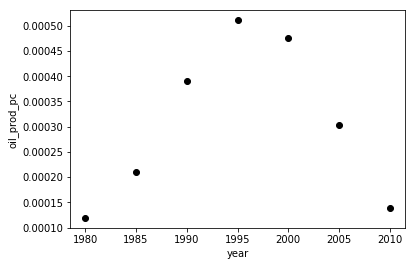

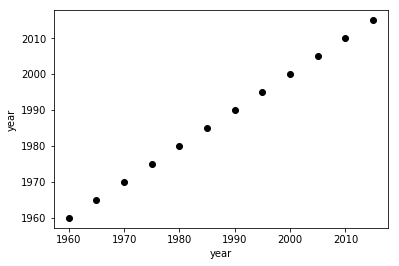

In [67]:
# Looking at graphs
filt = ds.code == "NOR"
nor = ds[filt]
nor = nor[['eci1', 'eci2', "eci3", "gdp_pc", "population", "res_exp1_to_gdp", 
                                   "res_exp2_to_gdp", "res_exp3_to_gdp", 
     "oil_rents", "res_rents", "oil_prod_pc", "year"]].astype(float)

for column in nor.columns:
    if nor[column].dtypes == "float64":
        x = nor.year.astype(int)
        y = nor[column]
        plt.figure()
        plt.xlabel("year")
        plt.ylabel(column)
        print(plt.plot(x, y, 'o', color='black'))

In [68]:
ds.to_csv("5y_dataset_transformed.csv")

In [ ]:
# END